In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
import seaborn as sns 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum().sum()

0

In [5]:
fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 
print('Fraud casess: ', len(fraud))
print('Valid casess: ', len(valid))

Fraud casess:  492
Valid casess:  284315


In [6]:
#separating the X and the Y values
X = df.drop(['Class'], axis = 1) 
Y = df["Class"] 
print(X.shape) 
print(Y.shape) 

xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [7]:
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.25, random_state = 42) 

In [8]:
nb_model = GaussianNB()
# Train the model
nb_model.fit(xTrain, yTrain)
# Predict on the test set
yPred = nb_model.predict(xTest)

In [9]:
print("The model used here is Naive Bayes Classifier") 
print("The accuracy is: ", round(accuracy_score(yTest, yPred), 5)) 
print("The precision is: ", round(precision_score(yTest, yPred), 5))
print("The recall is: ", round(recall_score(yTest, yPred), 5))
print("The F1-Score is: ", round(f1_score(yTest, yPred), 5))

The model used here is Naive Bayes Classifier
The accuracy is:  0.99312
The precision is:  0.13958
The recall is:  0.64602
The F1-Score is:  0.22956


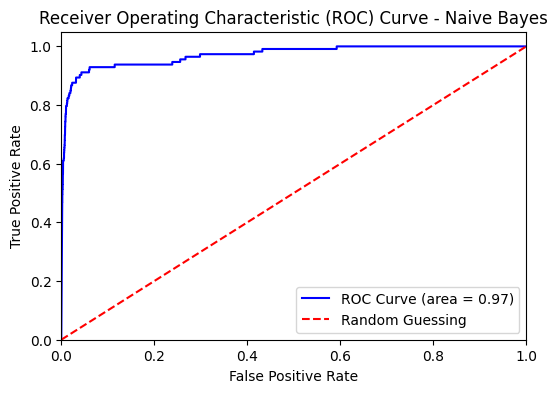

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = nb_model.predict_proba(xTest)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(yTest, y_pred_proba)
roc_auc = roc_auc_score(yTest, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()
